## Dataset - Flood Prediction Dataset

The dataset was generated from a deep learning model trained on the Flood Prediction Factors [dataset](https://www.kaggle.com/datasets/brijlaldhankour/flood-prediction-factors). Feature distributions are close to, but not exactly the same, as the original. 

## Objectives
* In this notebook, I will understand how the data and do necessary Exploratory Data Analysis and Feature Engineering.
* With the preprocessed data, lets build all the models and see which performs better on the data.

**In this Notebook, I will explore everything from EDA to Model Building and write down my Observations at the end.**


# Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

## User defined functions

In [2]:
# prints the shape
def df_shape(name, df):
    print("Shape of", name, "data =", df.shape)

# dataset description
def data_stats(df):
    if 'id' in df.columns:
        return df.drop('id',axis=1).describe().round(3).T.drop('count',axis=1)
    else:
        return df.describe().round(3).T.drop('count',axis=1)

# checks missing values
def missing_values(df1, df2, df3):
    print(f"Missing Values in data is:\n")
    l1 = df1.drop('id',axis=1).isna().sum().to_list()
    l2 = df2.drop('id',axis=1).isna().sum().to_list()
    l3 = df3.isna().sum().to_list()
    return pd.DataFrame([l1,l2, l3], columns=df3.columns, index=["train", "test", "original"]).T

# checks duplicates
def duplicate_values(df1, df2, df3):
    l = [df1.duplicated().sum(), df2.duplicated().sum(), df3.duplicated().sum()]
    return pd.DataFrame(l,  index=["train", "test", "original"], columns=["Duplicates"]).T

# Reading the data

In [3]:
# Importing the original data from flood-prdiction-factors
original = pd.read_csv('/kaggle/input/flood-prediction-factors/flood.csv')

# Importing the train and test dataframes from the playground series.
train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

# displaying first 5 rows
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


**Information about data:**

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Flood Prediction Factors dataset. Feature distributions are close to, but not exactly the same, as the original.

Now, I gonna check the differences between them.

# Dataset Info

In [4]:
df_shape("Train", train)
df_shape("Test", test)
df_shape("Original", original)

Shape of Train data = (1117957, 22)
Shape of Test data = (745305, 21)
Shape of Original data = (50000, 21)


In [5]:
# Datatypes of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

##### Every feature in the dataset is of Integer datatype.

In [6]:
# training data statistics
data_stats(train)

,mean,std,min,25%,50%,75%,max
MonsoonIntensity,4.921,2.056,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,4.927,2.094,0.000,3.00,5.000,6.00,18.000
RiverManagement,4.955,2.072,0.000,4.00,5.000,6.00,16.000
Deforestation,4.942,2.052,0.000,4.00,5.000,6.00,17.000
Urbanization,4.943,2.083,0.000,3.00,5.000,6.00,17.000
ClimateChange,4.934,2.058,0.000,3.00,5.000,6.00,17.000
DamsQuality,4.956,2.083,0.000,4.00,5.000,6.00,16.000
Siltation,4.928,2.066,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,4.943,2.069,0.000,3.00,5.000,6.00,16.000
Encroachments,4.949,2.083,0.000,4.00,5.000,6.00,18.000


In [7]:
# test data statistics
data_stats(test)

,mean,std,min,25%,50%,75%,max
MonsoonIntensity,4.916,2.056,0.0,3.0,5.0,6.0,16.0
TopographyDrainage,4.930,2.094,0.0,3.0,5.0,6.0,17.0
RiverManagement,4.960,2.072,0.0,4.0,5.0,6.0,16.0
Deforestation,4.946,2.053,0.0,4.0,5.0,6.0,17.0
Urbanization,4.938,2.082,0.0,3.0,5.0,6.0,17.0
ClimateChange,4.934,2.059,0.0,3.0,5.0,6.0,17.0
DamsQuality,4.958,2.089,0.0,4.0,5.0,6.0,16.0
Siltation,4.928,2.068,0.0,3.0,5.0,6.0,16.0
AgriculturalPractices,4.945,2.073,0.0,3.0,5.0,6.0,16.0
Encroachments,4.951,2.082,0.0,4.0,5.0,6.0,17.0


1. All the features in the dataset are ranging from 0 to 16, 17, 18, 19.
2. Looks like every feature in the data is following same distribution with
    * mean around 4.9
    * std around 2
    * q1 at 3,4
    * q2 qt 5
    * q3 at 6
    
Let's visualize the data to check the same. But before, let's check there are any missing values and duplicates.

In [8]:
# original data statistics
data_stats(original)

,mean,std,min,25%,50%,75%,max
MonsoonIntensity,4.991,2.237,0.000,3.000,5.0,6.000,16.000
TopographyDrainage,4.984,2.246,0.000,3.000,5.0,6.000,18.000
RiverManagement,5.016,2.231,0.000,3.000,5.0,6.000,16.000
Deforestation,5.008,2.223,0.000,3.000,5.0,6.000,17.000
Urbanization,4.989,2.243,0.000,3.000,5.0,6.000,17.000
ClimateChange,4.988,2.227,0.000,3.000,5.0,6.000,17.000
DamsQuality,5.015,2.245,0.000,3.000,5.0,6.000,16.000
Siltation,4.989,2.233,0.000,3.000,5.0,6.000,16.000
AgriculturalPractices,5.006,2.235,0.000,3.000,5.0,6.000,16.000
Encroachments,5.006,2.242,0.000,3.000,5.0,6.000,18.000


##### The train and test data follows almost similar distribution to Original data except for few features having mean around 5 and standard deviation around 2.2

### Missing Values

In [9]:
missing_values(train,test,original)

Missing Values in data is:



,train,test,original
MonsoonIntensity,0.0,0.0,0.0
TopographyDrainage,0.0,0.0,0.0
RiverManagement,0.0,0.0,0.0
Deforestation,0.0,0.0,0.0
Urbanization,0.0,0.0,0.0
ClimateChange,0.0,0.0,0.0
DamsQuality,0.0,0.0,0.0
Siltation,0.0,0.0,0.0
AgriculturalPractices,0.0,0.0,0.0
Encroachments,0.0,0.0,0.0


##### There are no missing values in the data

In [10]:
# duplicates in the data
duplicate_values(train, test, original)

,train,test,original
Duplicates,0,0,0


##### There are no duplicates in the data

# Adding Statistical Features and Impact

Based on the discussions, I have decided to study the impact of statistical features such as Mean, Standard deviation, Min, Max, Sum, multiplication, Q1(25th percentile), Q2(50th Percentile), Q3(75th percentile), Variance, Skewness, Kurtosis.

* Skewness is the statistical measure which measures the asymmetry of data distribution.
* Kurtosis measures the tailedness if the data distribution.

Discussion: https://www.kaggle.com/competitions/playground-series-s4e5/discussion/499484

In [11]:
# creating all the columns
def feature_creation(df):
    if 'id' in df.columns:
        i = 1
        j = 21
    else:
        i = 0
        j = 20

    df['mean'] = df.iloc[:,i:j].mean(axis = 1)
    df['std'] = df.iloc[:,i:j].std(axis = 1)
    df['min'] = df.iloc[:,i:j].min(axis = 1)
    df['max'] = df.iloc[:,i:j].max(axis = 1)
    df['sum'] = df.iloc[:,i:j].sum(axis = 1)
    df['multiplication'] = df.iloc[:,i:j].prod(axis = 1)
    df['Q1'] = df.iloc[:,i:j].quantile(0.25, axis=1)
    df['Q2'] = df.iloc[:,i:j].median(axis=1)
    df['Q3'] = df.iloc[:,i:j].quantile(0.75, axis=1)
    df['Variance'] = df.iloc[:,i:j].var(axis=1)
    df['Skewness'] = df.iloc[:,i:j].skew(axis=1)
    df['Kurtosis'] = df.iloc[:,i:j].kurtosis(axis=1)

    return df

In [12]:
# creating features in train data and test data
train_st = feature_creation(train)
test_st = feature_creation(test)
original_st = feature_creation(original)

### Understanding features

In [13]:
# visualizing the statistical features
train_st.iloc[:, 21:]

,FloodProbability,mean,std,min,max,sum,multiplication,Q1,Q2,Q3,Variance,Skewness,Kurtosis
0,0.445,4.70,1.750188,2,8,94,7315660800000,3.00,4.5,5.25,3.063158,0.577258,-0.521862
1,0.450,4.70,2.296450,0,9,94,0,3.00,4.0,6.25,5.273684,0.148339,-0.358403
2,0.530,4.95,1.932411,1,8,99,10081895040000,3.00,5.0,6.25,3.734211,-0.408083,-0.742415
3,0.535,5.20,1.641565,2,8,104,72831467520000,4.00,5.0,6.25,2.694737,0.120566,-0.590749
4,0.415,3.60,1.500877,1,6,72,20155392000,2.75,3.0,5.00,2.252632,0.253227,-0.922261
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,0.495,4.95,2.543826,1,10,99,4551966720000,3.00,4.0,7.00,6.471053,0.616174,-0.289320
1117953,0.480,4.80,2.419221,1,9,96,2821754880000,3.00,4.0,5.50,5.852632,0.606652,-0.530161
1117954,0.485,4.90,1.970840,1,9,98,9185400000000,4.00,5.0,5.25,3.884211,0.383184,0.854564
1117955,0.495,4.95,1.700619,2,8,99,22122558259200,3.75,5.0,6.00,2.892105,0.014803,-1.100009


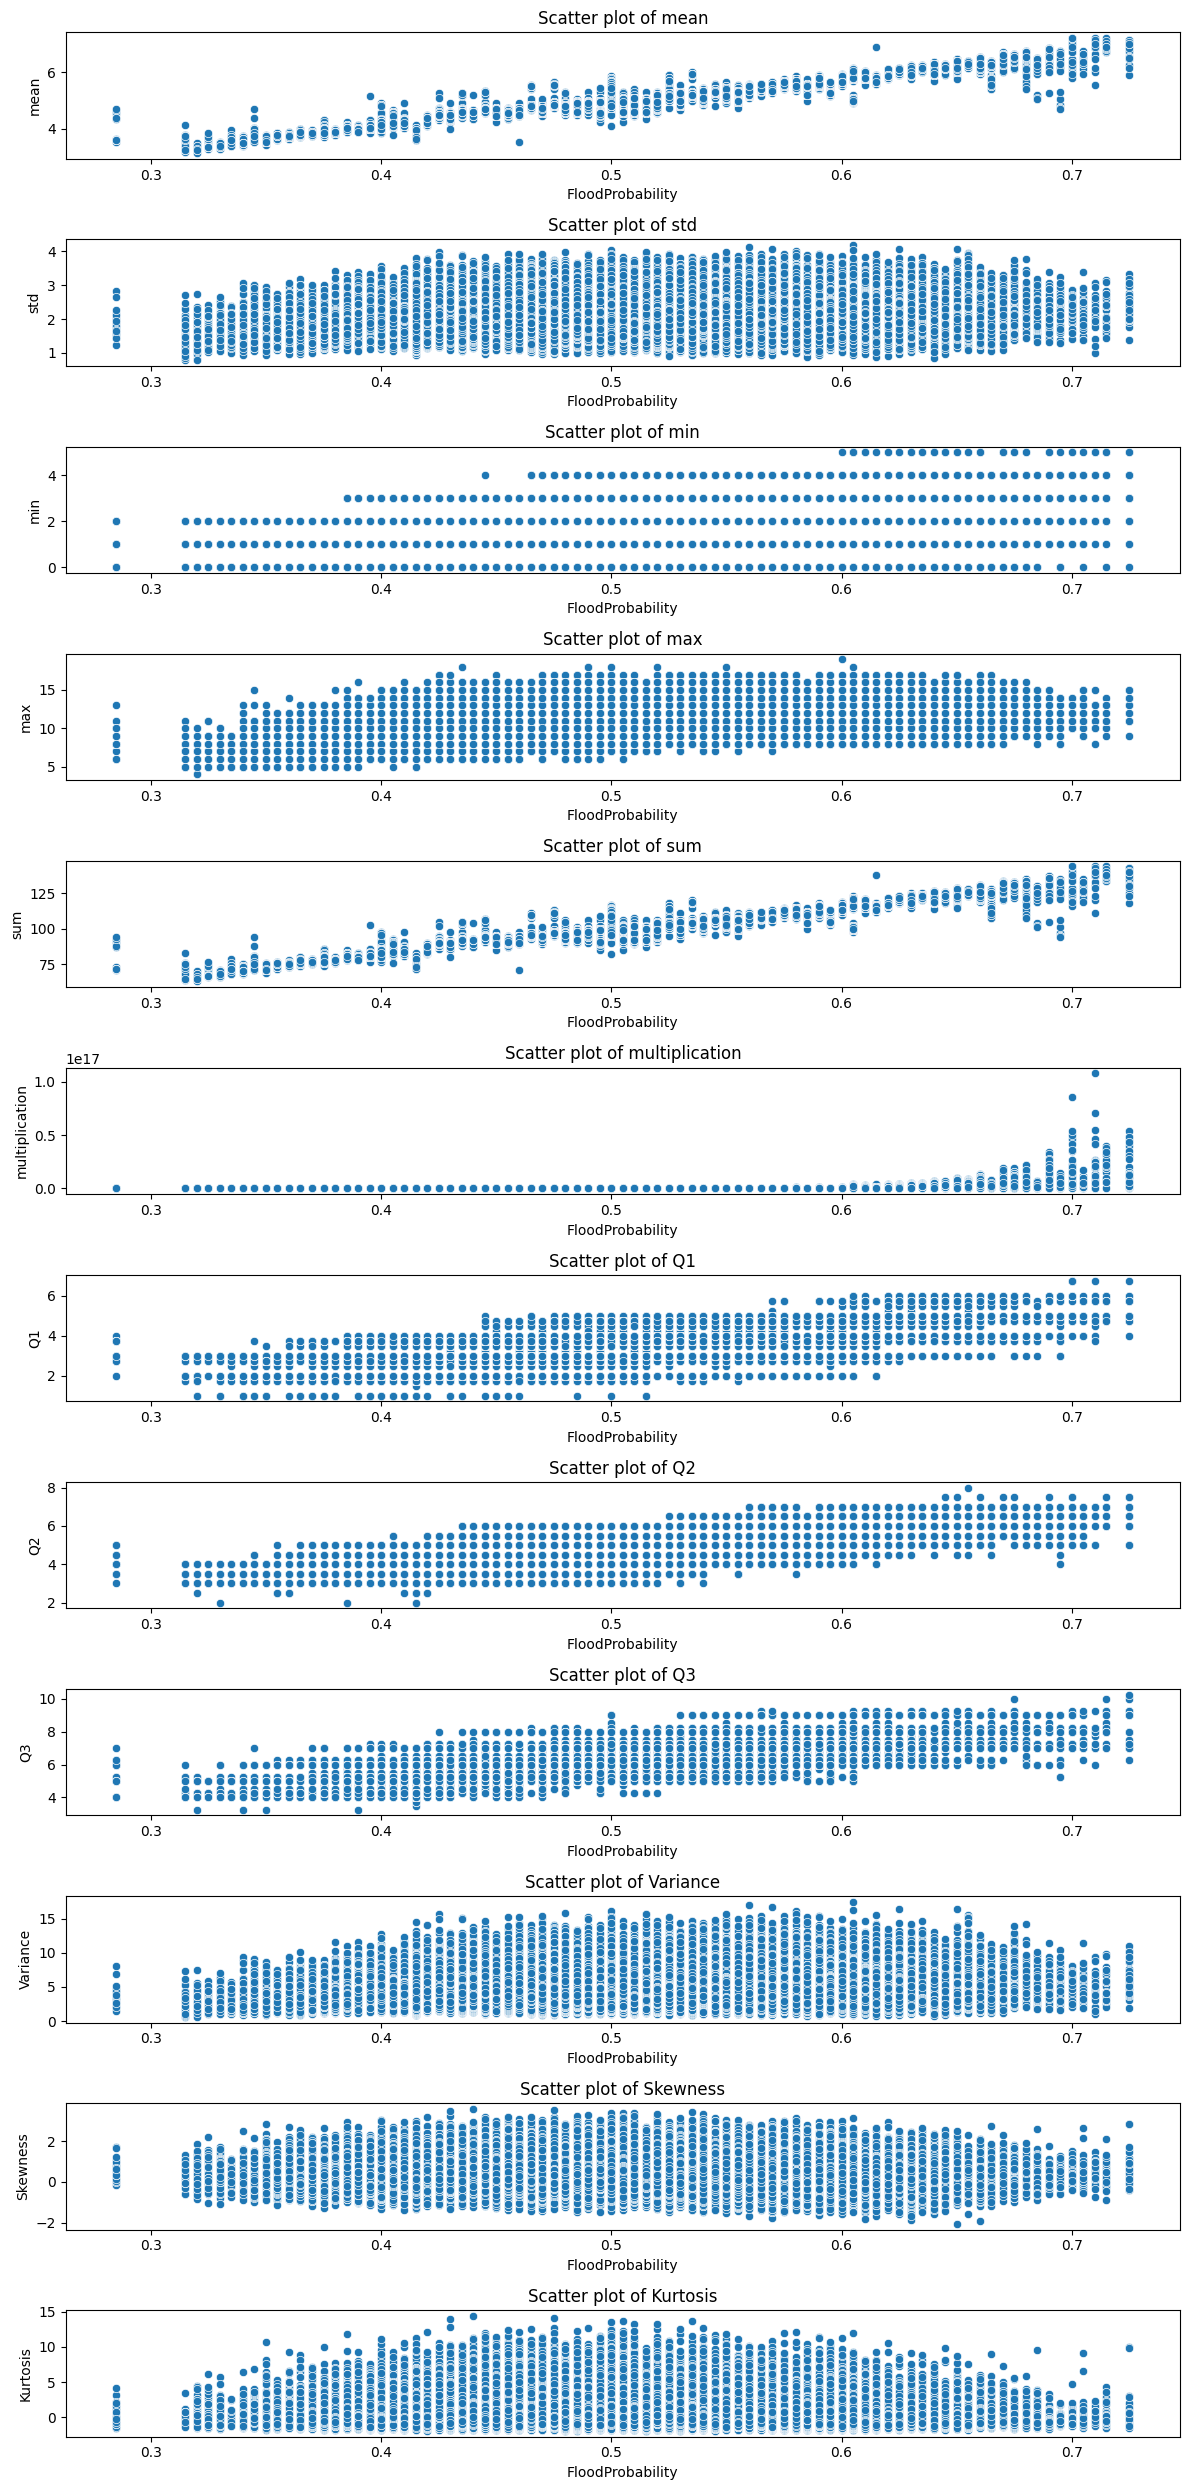

In [14]:
# lets visualize the variables
fig, ax = plt.subplots(nrows = 12, ncols = 1, figsize=(12,25))

# columns to visualize the distribution
for i, col in enumerate(train.columns[22:]):
    # Calculate row and column indices for the subplot grid

    sns.scatterplot(x= 'FloodProbability', y=col,data=train, ax=ax[i])
    ax[i].set_title(f'Scatter plot of {col}')

plt.tight_layout()
plt.show()

Based on the plots, we can say there is some linear relation of features such as mean, sum, q1, q2, q3 with FloodProbability. Let's plot the heatmap and check it

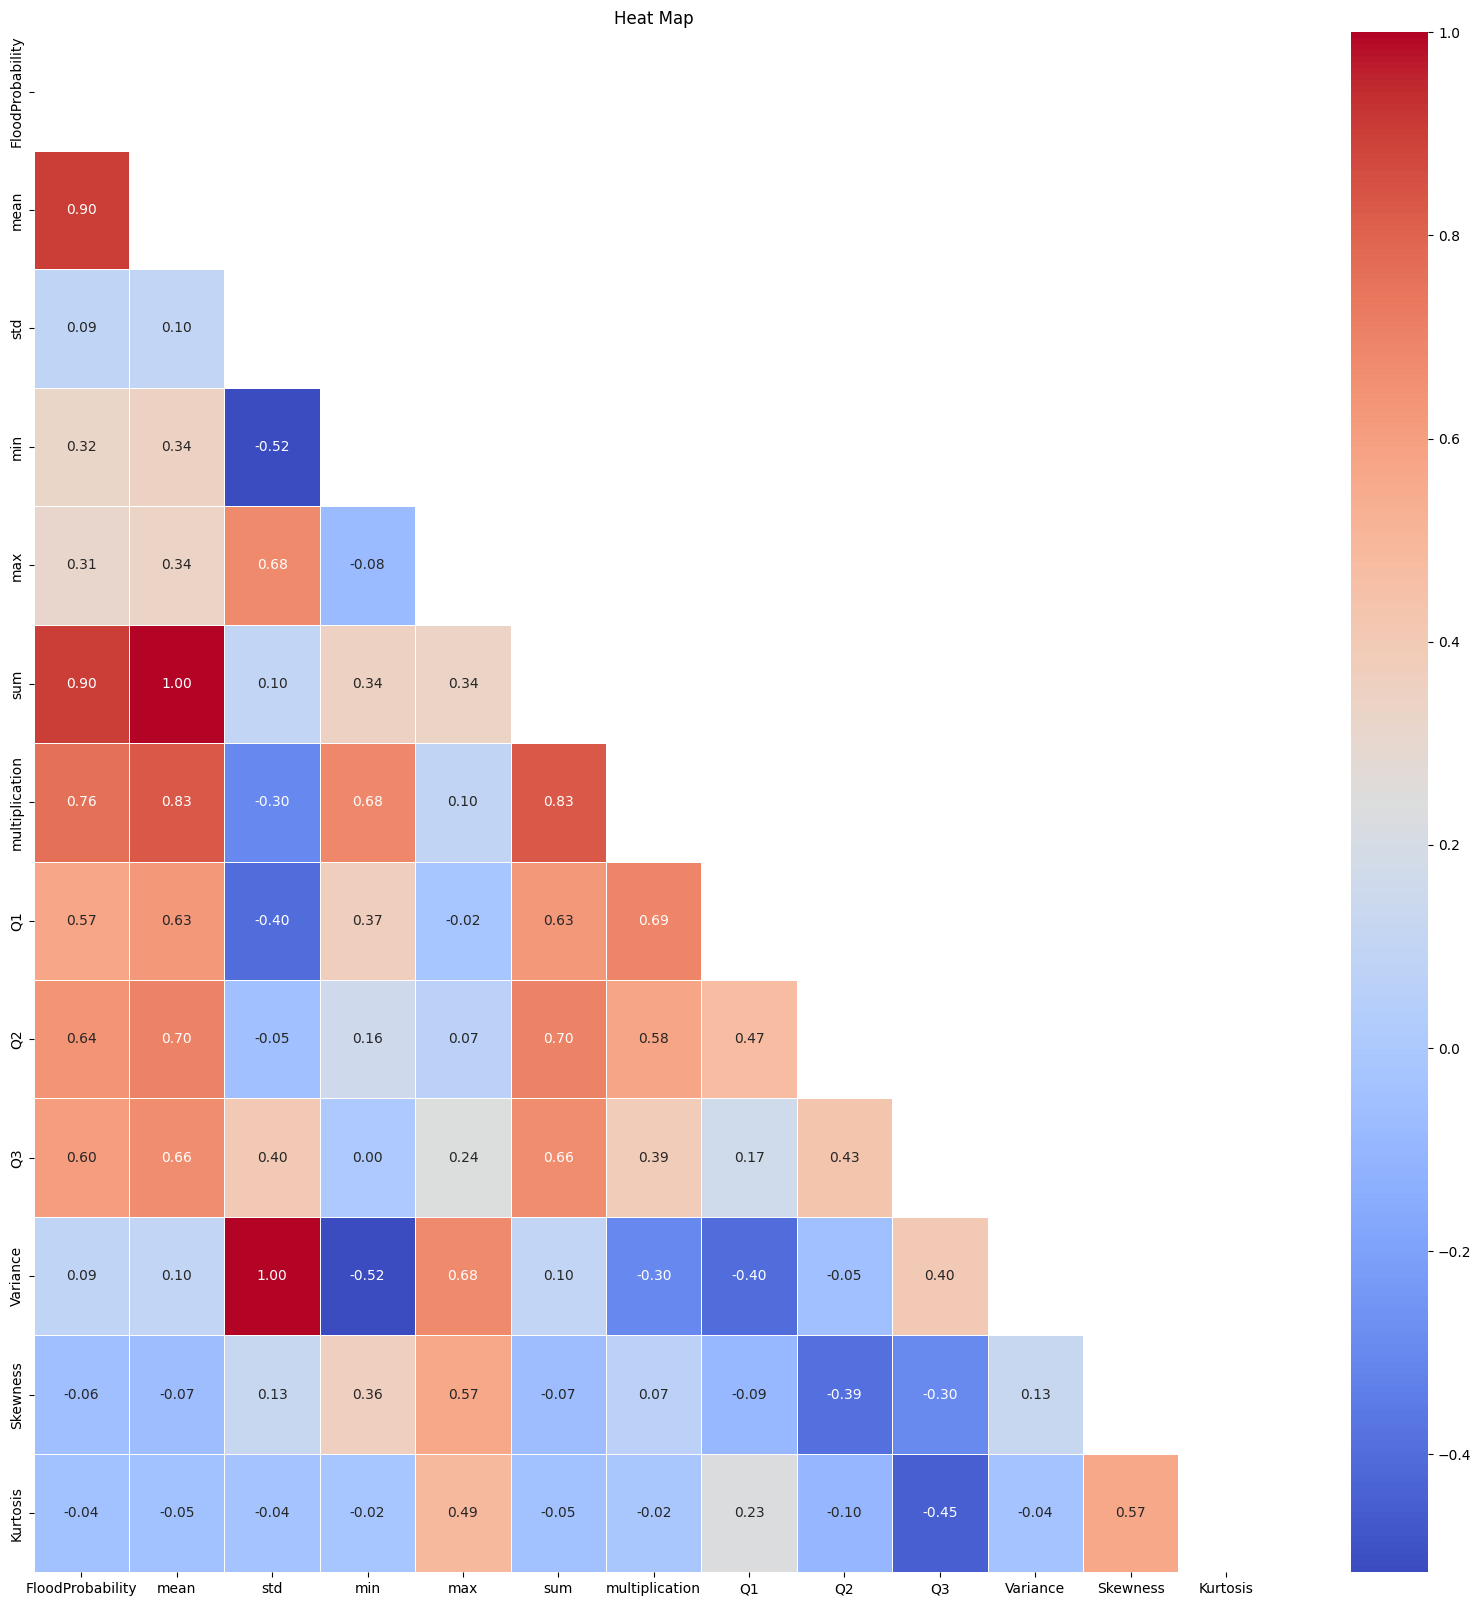

In [15]:
plt.figure(figsize=(20,20))
corr_matrix = train_st.iloc[:,21:].corr(method = 'spearman')

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt='.2f', linewidths= 0.5, mask = mask)
plt.title('Heat Map')
plt.show()

# Exploratory Data Analysis

### Exploring Target Variable

Text(0.5, 1.0, 'Flood Probability Distribution')

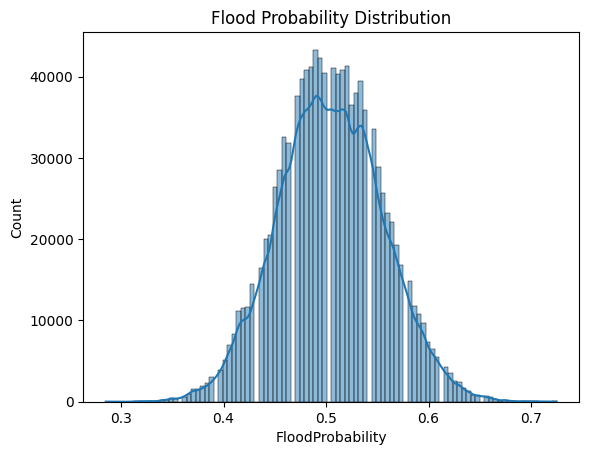

In [16]:
# Exploring target variable

sns.histplot(train.FloodProbability, bins=100, kde=True)
plt.title("Flood Probability Distribution")

In [17]:
train.FloodProbability.describe().round(3)

count    1117957.000
mean           0.504
std            0.051
min            0.285
25%            0.470
50%            0.505
75%            0.540
max            0.725
Name: FloodProbability, dtype: float64

The values in ***Flood Probability*** following the normal distribution varies from 0.285 to 0.725 with ***mean of 0.504*** and ***std of 0.05***

### Visualize the features

Every feature has integer values. Now, lets plot its frequency across the values.

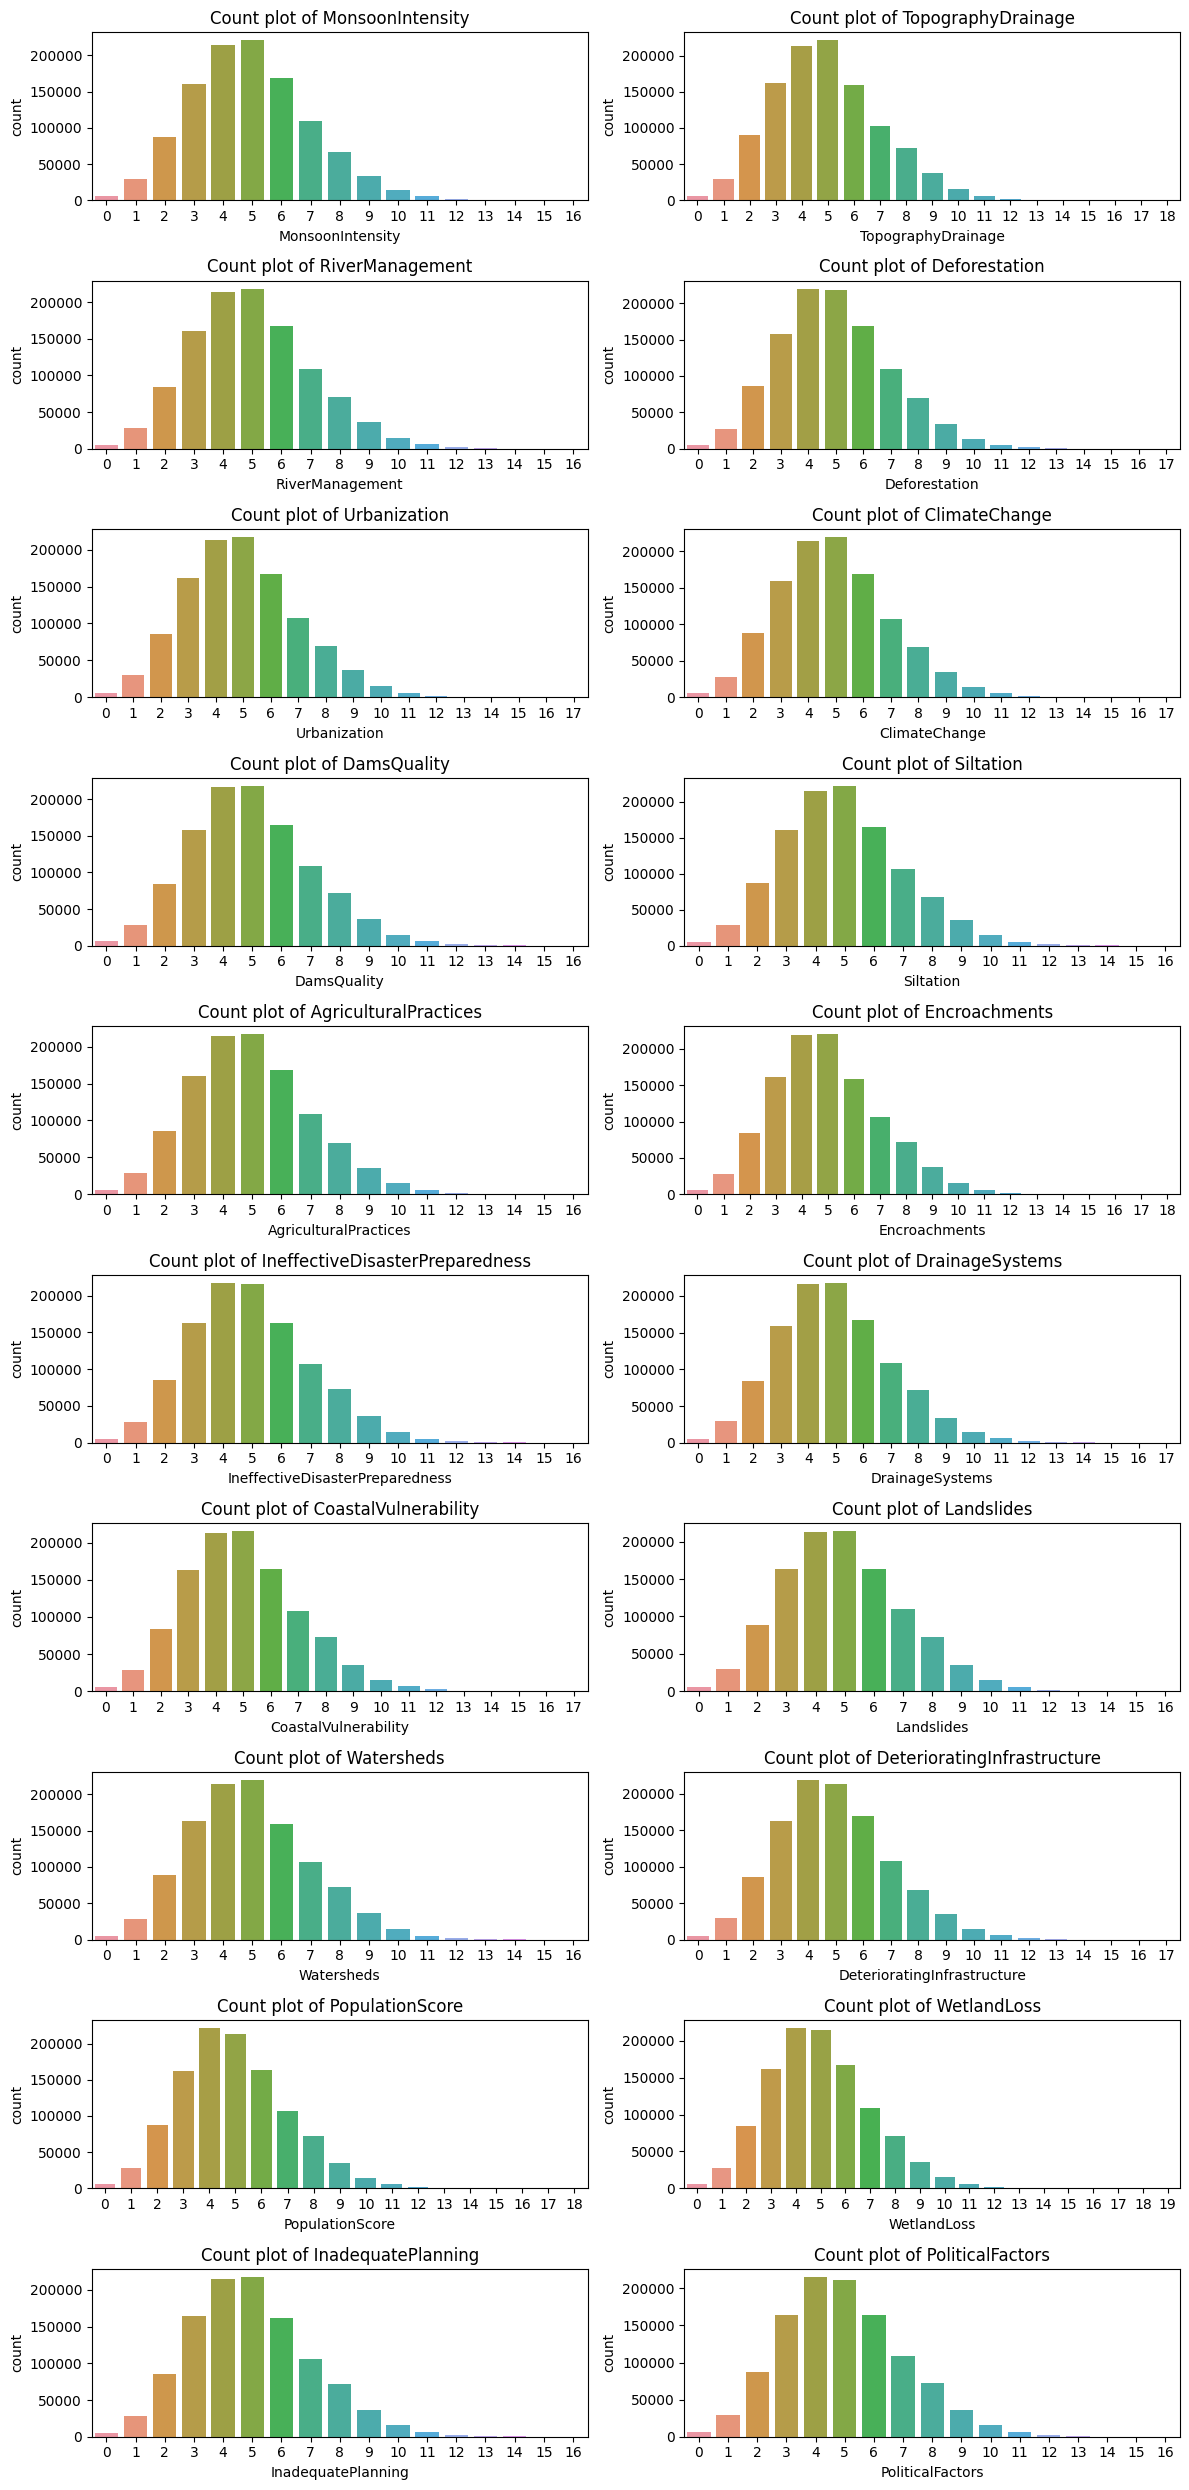

In [18]:
# lets visualize the variables
fig, ax = plt.subplots(nrows = 10, ncols = 2, figsize=(12,25))

# columns to visualize the distribution
for i, col in enumerate(train.columns[1:21]):
    # Calculate row and column indices for the subplot grid
    row = i // 2
    col_num = i % 2

    sns.countplot(x=col, data=train, ax=ax[row, col_num])
    ax[row, col_num].set_title(f'Count plot of {col}')

plt.tight_layout()
plt.show()

As we discussed, all the features followed the same distribution and we can't infer much information from these plots. We may need to explore more to get further insights from the data.

In [19]:
# sns.pairplot(train)

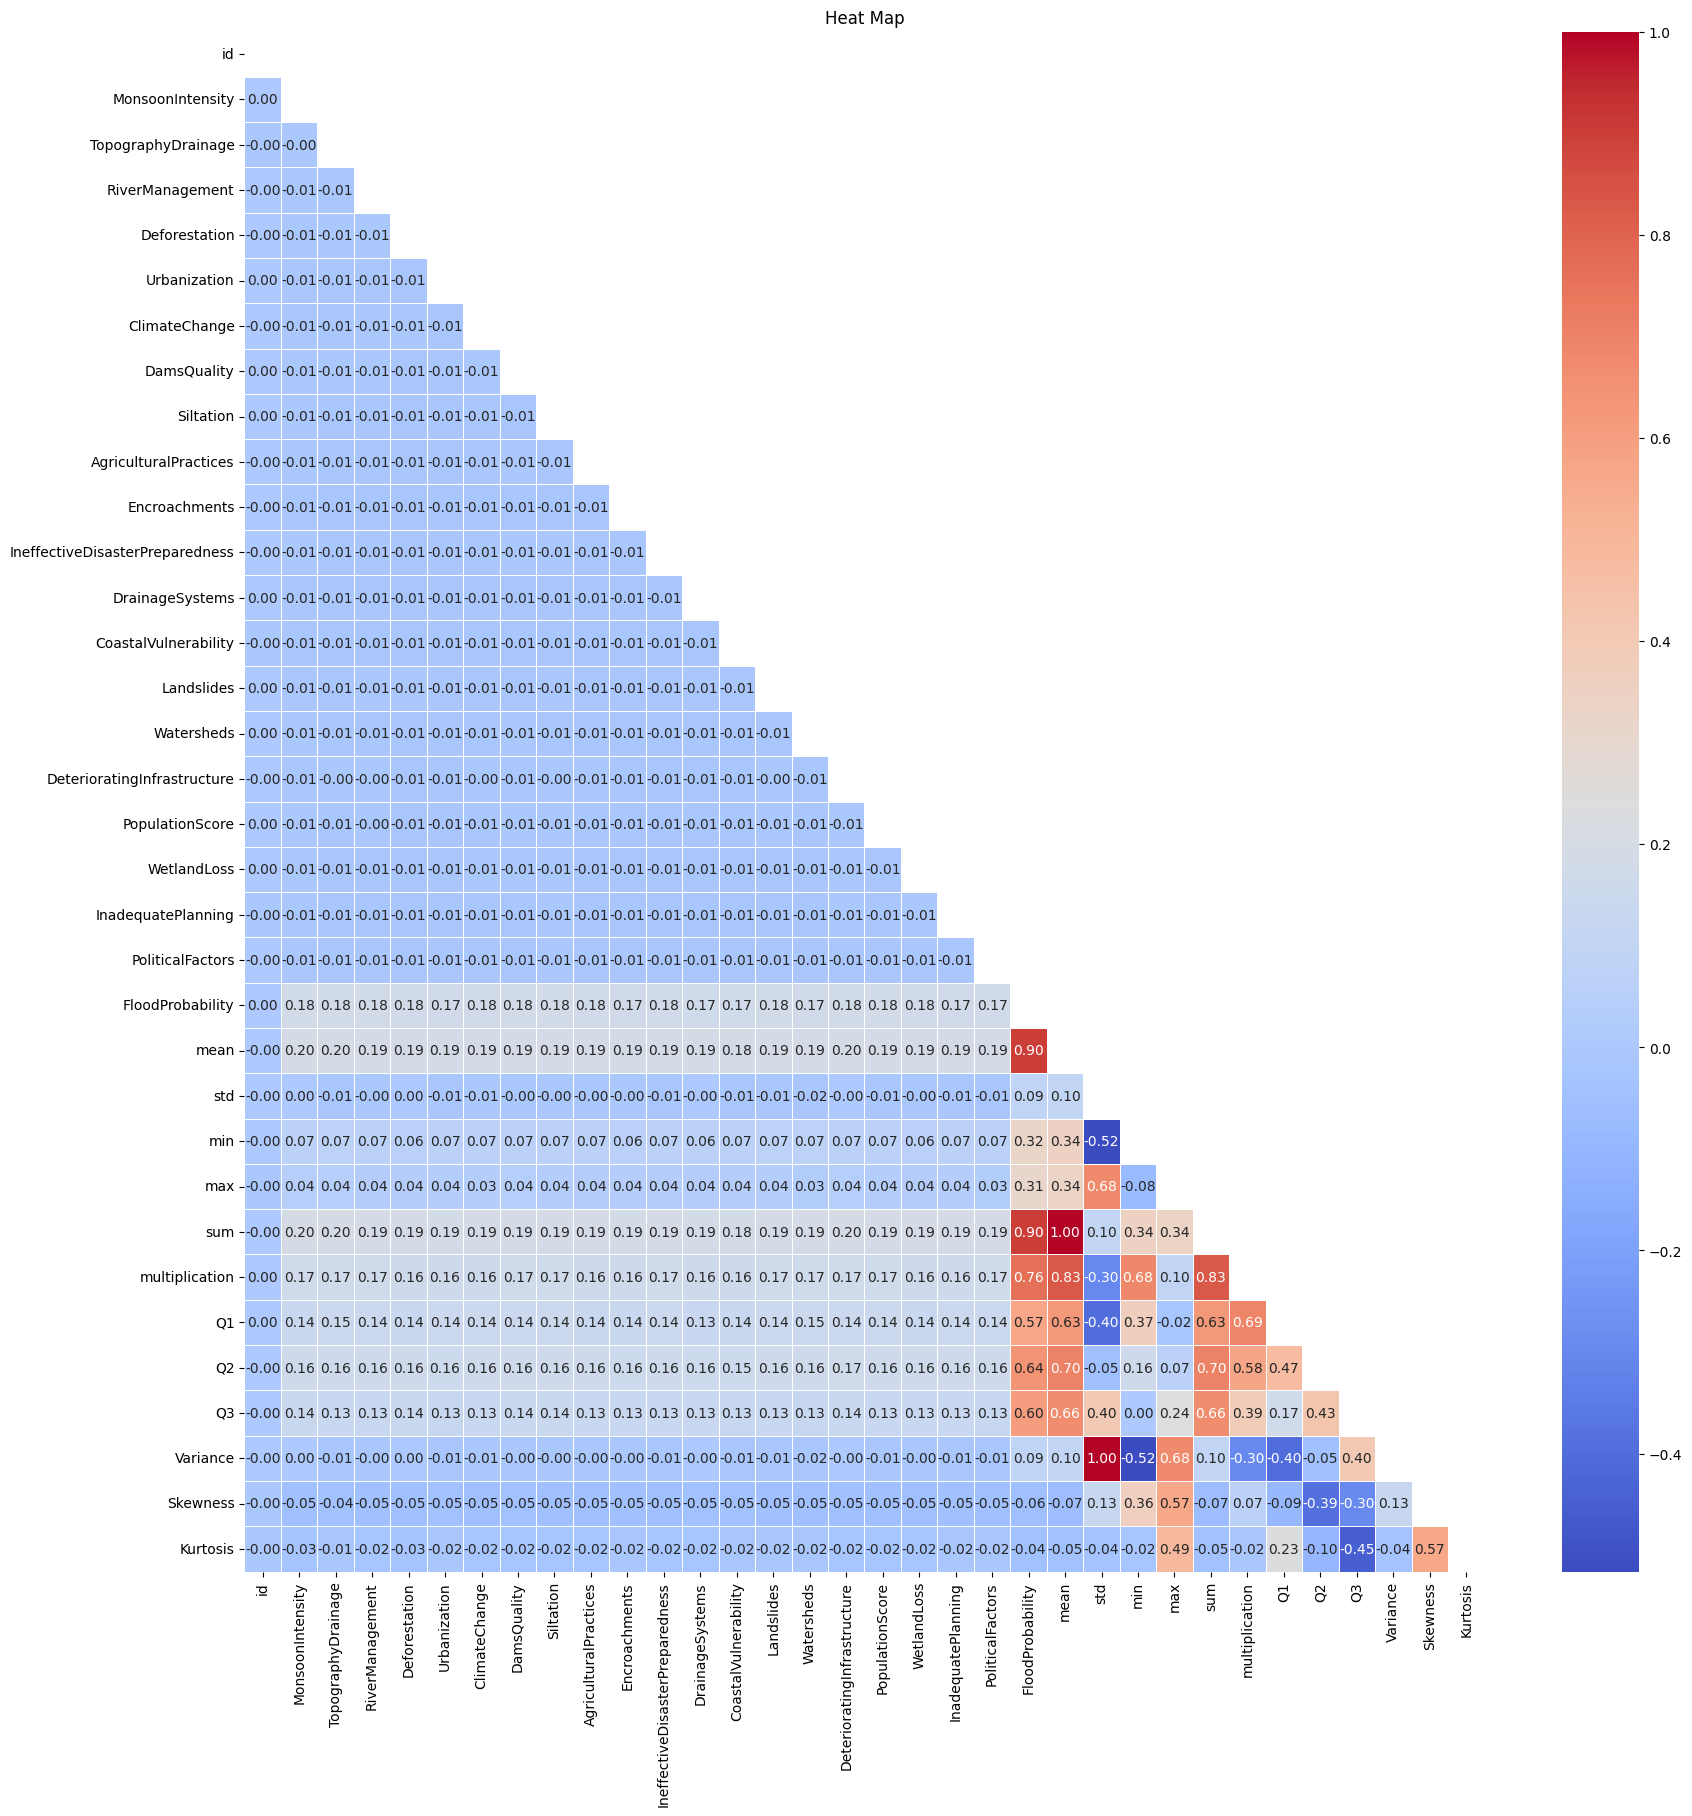

In [20]:
plt.figure(figsize=(20,20))
corr_matrix = train.corr(method = 'spearman')

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt='.2f', linewidths= 0.5, mask = mask)
plt.title('Heat Map')
plt.show()

From above scatterplots and heatmap, we can conclude there is no relationship between any independent features and all are slightly correlated with target variable.

# Scaling the data 

In [21]:
# combining original and train dataframes for better training.
train_st = train_st.drop(['id'], axis=1)
combined_df = pd.concat([train_st, original_st])
print(combined_df.shape)

(1167957, 33)


In [22]:
# lets test the model performance by including and excluding the statistical features.
features_include = True
if(features_include):
    X = combined_df.drop('FloodProbability', axis=1)
    y = combined_df['FloodProbability']
else:
    X = train.drop('Floodprobability', axis=1)
    y = train['FloodProbability']

In [23]:
# creating scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# applying on train and test data
X_scaled = scaler.fit_transform(X)

# creating dataframe
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [24]:
# sizes of train and test data
df_shape("X_train", X_train)
df_shape("X_test", X_test)
df_shape("y_train", y_train)
df_shape("y_test", y_test)

Shape of X_train data = (817569, 32)
Shape of X_test data = (350388, 32)
Shape of y_train data = (817569,)
Shape of y_test data = (350388,)


# Cross Validation

Checking whether the model is performing consistent across all the folds. To perform the Cross Validation I am using base CatBoost Model.

In [25]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []
model = CatBoostRegressor(random_state=42, silent=True)

for fold, (train_index, val_index) in enumerate(cv.split(X_scaled), start =1):
    X_train_fold, X_val_fold = X_scaled.iloc[train_index], X_scaled.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Train the model on the training fold
    model.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation fold
    y_val_pred = model.predict(X_val_fold)
    
    # Calculate the R² score for the validation fold
    r2 = r2_score(y_val_fold, y_val_pred)
    
    r2_scores.append(r2)
    
    print(f"Fold {fold}: R² Score = {r2:.4f}")
    
# Convert R² scores to a numpy array for easier handling
r2_scores = np.array(r2_scores)

# Print cross-validation scores
print("Mean Cross-Validation R² Score:", np.mean(r2_scores))

Fold 1: R² Score = 0.8702
Fold 2: R² Score = 0.8708
Fold 3: R² Score = 0.8714
Fold 4: R² Score = 0.8714
Fold 5: R² Score = 0.8707
Mean Cross-Validation R² Score: 0.8708962256789725


# Model Building

For the data, I am going to build the regression models such as Linear, Ridge, Lasso, RFRegressor, XGBRegressor, CatBoostRegressor, AdaBoost Regressor.

Let's take the best performing model and tune it further to get the optimal r2score

In [26]:
# Tracking all model scores
metrics = {}

# returns the r2 score
def r2score(model, X_test,y_test):
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

def horizontal_bar_plot(df):
    # Create a horizontal bar plot using Seaborn
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x=df.columns[1], y=df.columns[0], data=df, palette='coolwarm')

    for index, row in df.iterrows():
        barplot.text(row[df.columns[1]], index, f'{row[df.columns[1]]:.2f}', color='black', ha='right')

    # Set plot title and labels
    plt.title('Importance Plot')
    plt.xlabel('values')
    plt.ylabel('Features')
    
    # Display the plot
    plt.show()

### Models - Linear, Lasso, Ridge Regression

In [27]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
metrics['LinearRegression'] = r2score(lr_model, X_test, y_test)
print("R2 Score for Linear Regression:", metrics['LinearRegression'])

# L2 Reguarization
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train, y_train)
metrics['Ridge'] = r2score(ridge, X_test, y_test)
print("R2 Score for Ridge Regression:", metrics['Ridge'])

# L1 Reguarization
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
metrics['Lasso'] = r2score(lasso, X_test, y_test)
print("R2 Score for Lasso Regression:", metrics['Lasso'])

R2 Score for Linear Regression: 0.8479910635504471
R2 Score for Ridge Regression: 0.847991408497043
R2 Score for Lasso Regression: 0.8094522803039556


### Models - DecisionTree, RandomForest, AdaBoost

In [28]:
# Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
metrics['DecisionTreeRegressor'] = r2score(tree_model, X_test, y_test)
print("R2 Score for Decision Tree Regressor:", metrics['DecisionTreeRegressor'])

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=5, random_state=42)
rf_model.fit(X_train, y_train)
metrics['RandomForestRegressor'] = r2score(rf_model, X_test, y_test)
print("R2 Score for Random Forest Regressor:", metrics['RandomForestRegressor'])

# Ada Boost Regressor
# using base estimator as decision tree and wanted to improve upon that on other iterations
adaboost_model = AdaBoostRegressor(base_estimator=tree_model, n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)
metrics['AdaBoostRegressor'] = r2score(adaboost_model, X_test, y_test)
print("R2 Score for AdaBoost Regressor:", metrics['AdaBoostRegressor'])

R2 Score for Decision Tree Regressor: 0.7319470951358322
R2 Score for Random Forest Regressor: 0.865105637471099
R2 Score for AdaBoost Regressor: 0.8519695324173668


For the models I have running from here, I have took the parameters from the notebook of Aravind Pillai. 
* Link - https://www.kaggle.com/code/aspillai/flood-prediction-regression-lgb-xgb-cat/notebook#Read-Source-Files

In [29]:
# lightgbm parameters
lgb_params = {
    'boosting_type': 'gbdt', 
    'n_estimators':2000, 
    'learning_rate' :  0.012, 
    'device':'cpu',
    'num_leaves' : 250, 
    'subsample_for_bin': 165700, 
    'min_child_samples': 114, 
    'reg_alpha': 2.075e-06, 
    'reg_lambda': 3.839e-07, 
    'colsample_bytree': 0.9634,
    'subsample': 0.9592, 
    'max_depth': 10,
    'random_state':0,
    'verbosity':-1
}

# xgboost parameters
xgb_params ={
    'n_estimators':5000,
    'max_depth': 10,
    'tree_method': 'hist',
    'learning_rate': 0.01,
    'random_state':0,
}
             
# catboost parameters
cat_params ={
    'n_estimators':8000,
    'random_state':0,
    'learning_rate': 0.011277016304363601, 
    'depth': 8, 
    'subsample': 0.8675506657380021, 
    'colsample_bylevel': 0.7183884158632279, 
    'min_data_in_leaf': 98,
    'silent': True,
}

### CatBoost Model

In [30]:
catboost_model = CatBoostRegressor(**cat_params)   
catboost_model.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],early_stopping_rounds=50,verbose=1000)

metrics['CatBoostRegressor'] = r2score(catboost_model, X_test, y_test)
print("R2 Score for CatBoost Regressor:", metrics['CatBoostRegressor'])

0:	learn: 0.0505326	test: 0.0505326	test1: 0.0504523	best: 0.0504523 (0)	total: 217ms	remaining: 28m 57s
1000:	learn: 0.0183583	test: 0.0183583	test1: 0.0184286	best: 0.0184286 (1000)	total: 3m 6s	remaining: 21m 43s
2000:	learn: 0.0182730	test: 0.0182730	test1: 0.0183769	best: 0.0183769 (2000)	total: 6m 13s	remaining: 18m 40s
3000:	learn: 0.0182178	test: 0.0182178	test1: 0.0183657	best: 0.0183656 (2999)	total: 9m 21s	remaining: 15m 35s
4000:	learn: 0.0181713	test: 0.0181713	test1: 0.0183609	best: 0.0183609 (3999)	total: 12m 31s	remaining: 12m 30s
5000:	learn: 0.0181248	test: 0.0181248	test1: 0.0183583	best: 0.0183583 (5000)	total: 15m 41s	remaining: 9m 24s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.0183580265
bestIteration = 5088

Shrink model to first 5089 iterations.
R2 Score for CatBoost Regressor: 0.8701036766516466


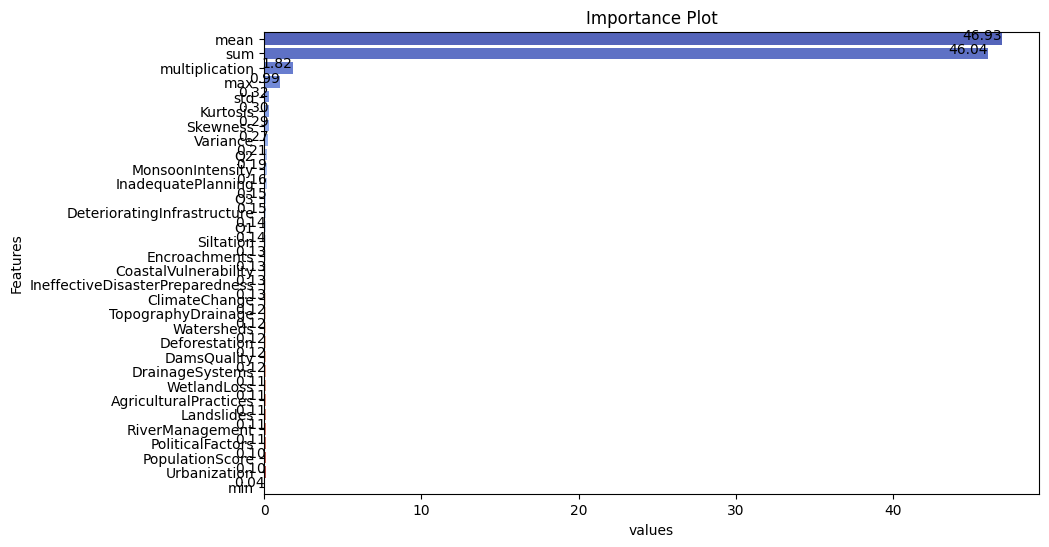

In [31]:
# finding the features importance
feature_importance = catboost_model.get_feature_importance(data=None, prettified=True)

horizontal_bar_plot(feature_importance)

### LGBM Model

In [32]:
lgbm_model = LGBMRegressor(**lgb_params)
lgbm_model.fit(X_train, y_train, eval_set=[(X_test, y_test)],
               callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(1000)])

metrics['LGBMRegressor'] = r2score(lgbm_model, X_test, y_test)
print("R2 Score for LGBM Regressor:", metrics['LGBMRegressor'])

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[507]	valid_0's l2: 0.000336679
R2 Score for LGBM Regressor: 0.8702341892421516


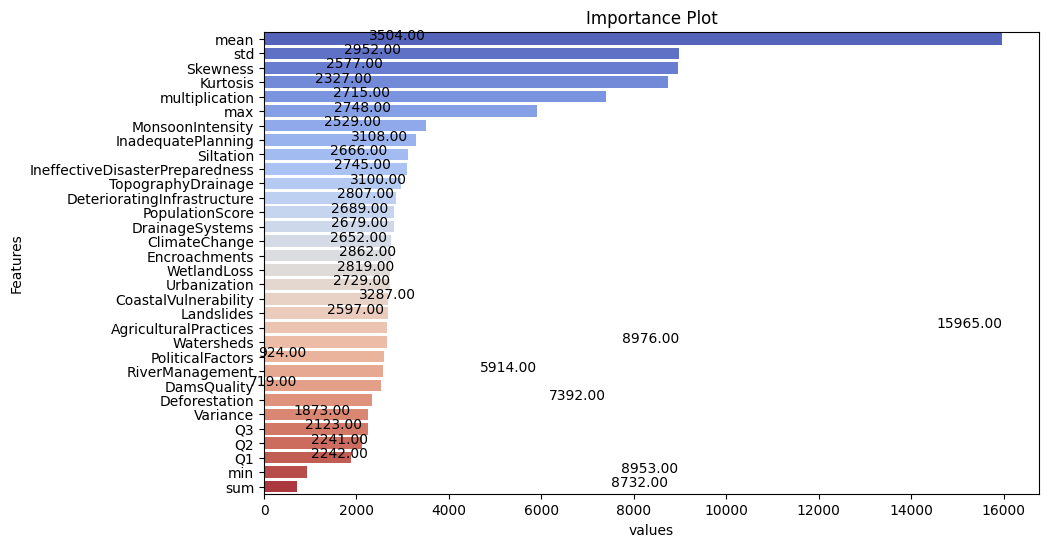

In [33]:
# finding the feature importance
importance = lgbm_model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature Id': X_train.columns, 'Importances': importance})
importance_df = importance_df.sort_values(by='Importances', ascending=False)

horizontal_bar_plot(importance_df)

### XGBoost Model

In [34]:
xgb_model = XGBRegressor(**xgb_params)
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],early_stopping_rounds=50,verbose=100)

metrics['XGBRegressor'] = r2score(xgb_model, X_test, y_test)
print("R2 Score for XGB Regressor:", metrics['XGBRegressor'])

[0]	validation_0-rmse:0.05057	validation_1-rmse:0.05049
[100]	validation_0-rmse:0.02510	validation_1-rmse:0.02517
[200]	validation_0-rmse:0.01919	validation_1-rmse:0.01942
[300]	validation_0-rmse:0.01819	validation_1-rmse:0.01851
[400]	validation_0-rmse:0.01799	validation_1-rmse:0.01838
[500]	validation_0-rmse:0.01790	validation_1-rmse:0.01837
[600]	validation_0-rmse:0.01782	validation_1-rmse:0.01837
[616]	validation_0-rmse:0.01781	validation_1-rmse:0.01837
R2 Score for XGB Regressor: 0.8699661145502706


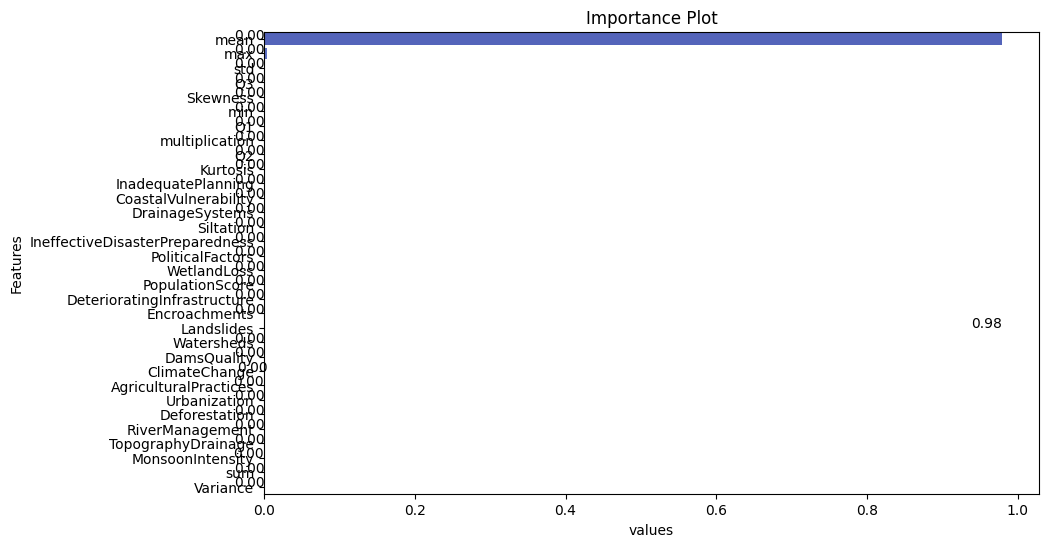

In [35]:
# Plotting the feature importance
importance = xgb_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature Id': X_train.columns, 'Importances': importance})
importance_df = importance_df.sort_values(by='Importances', ascending=False)

horizontal_bar_plot(importance_df)

# Model Performance Comparision

In [36]:
metrics_df = pd.DataFrame(metrics.items(), columns = ['Model', 'R2'])

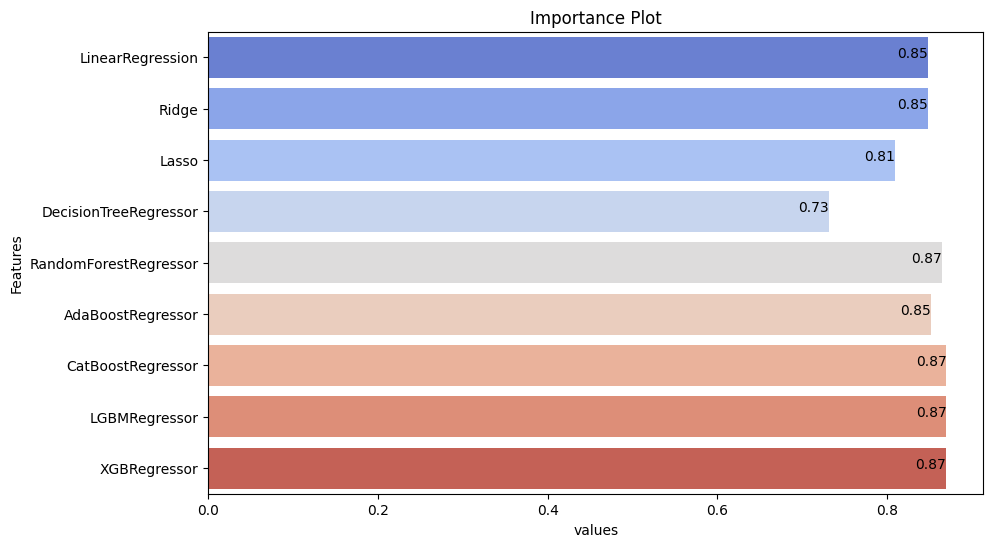

In [37]:
horizontal_bar_plot(metrics_df)

**I have applied all the linear, tree and boosting models, we can see Boosting algorithms such as CatBoost, LGBM and XGB outperforming all the models.**

# Prediction on test data

In [38]:
test_st = test.drop('id', axis=1)

# scaling the testdata
test_st = scaler.transform(test_st)
test_st = pd.DataFrame(test_st, columns = test.columns[1:])

In [39]:
# prediction using catboost
best_model = catboost_model
test_predictions = best_model.predict(test_st)
output = pd.DataFrame({'id': test.id,
                       'FloodProbability': test_predictions})

output.to_csv('catboost_model_submission.csv', index=False)

# prediction using catboost
best_model = xgb_model
test_predictions = best_model.predict(test_st)
output = pd.DataFrame({'id': test.id,
                       'FloodProbability': test_predictions})

output.to_csv('xgb_model_submission.csv', index=False)


# prediction using catboost
best_model = lgbm_model
test_predictions = best_model.predict(test_st)
output = pd.DataFrame({'id': test.id,
                       'FloodProbability': test_predictions})

output.to_csv('lgbm_model_submission.csv', index=False)

1. Previously, I have done the Model Building with the knowledge I have using the Basic Models. It left we with R2 score of 0.84.
2. In the next step, **I have done the scaling of data. Definitely, scaling improved the performance of the model.**
3. In other step, I have following the discussions and created the new features in which new features has the good correlation with Target Variable leading to 0.87 R2 score in the notebook.
4. In the final step, I have took parameters of Aravind Pillai, which slightly imporved the R2 score.

#### Special Thanks to Aravind Pillai. Personally, I have learnt a lot of Hyperparameter Tuning and Model Training after going through his notebooks.
